# Covid Data Project Solution

In this project we will be working with a covid 19 data set.Our aim is to build a supervised learning model to predict patients at high risk of seeking ICU treatment. We will try to create a model that will predict whether or not a patient need to be admitted in ICU or not.

<b>Import Libraries</b><br>

Import pandas,seaborn, and the useful libraries.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,classification_report,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

<b>The Data</b>

In [2]:
#Reading the dataset as dataframe df
df=pd.read_csv('C:\\Users\\user\\Desktop\\4050 new\\covid_data.csv')
#Displaying the top 5 rows of the csv file
df.head()

,Sample,Age,Sex,Severity,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,C1,39,male,NonICU,0.49,0.00,0.21,0.04,0.07,0.0,...,2.84,4.22,0.95,1.63,15.51,0.06,8.17,363.01,19.17,6.05
1,C2,63,male,NonICU,0.29,0.00,0.14,0.00,0.00,0.0,...,3.55,12.15,0.60,1.15,15.62,0.14,8.20,399.80,15.72,4.12
2,C3,33,male,NonICU,0.26,0.00,0.03,0.02,0.00,0.0,...,1.34,2.79,0.18,0.32,17.67,0.28,3.62,430.35,13.95,1.81
3,C4,49,male,NonICU,0.45,0.01,0.09,0.07,0.00,0.0,...,3.71,5.87,1.40,2.21,15.61,0.27,7.88,209.25,14.78,7.15
4,C5,49,male,NonICU,0.17,0.00,0.00,0.05,0.07,0.0,...,1.44,4.46,0.28,0.55,9.34,0.07,5.96,272.91,8.69,2.70


In [3]:
#Dimensionality of the dataset
df.shape

(126, 19476)

<b>Exploratory Data Analysis</b>

Let's use seaborn to explore the data!

** Create a histogram of the Age**

Text(0.5, 0, 'Age')

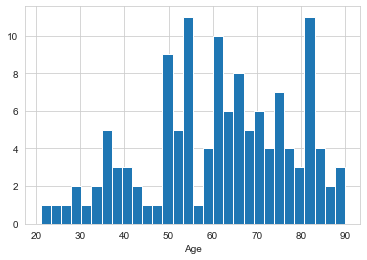

In [4]:
sns.set_style('whitegrid')
df['Age'].hist(bins=30)
plt.xlabel('Age')

From the above plot we can see the number of patients in each age group.

<b>*Countplot for sex column*</b>

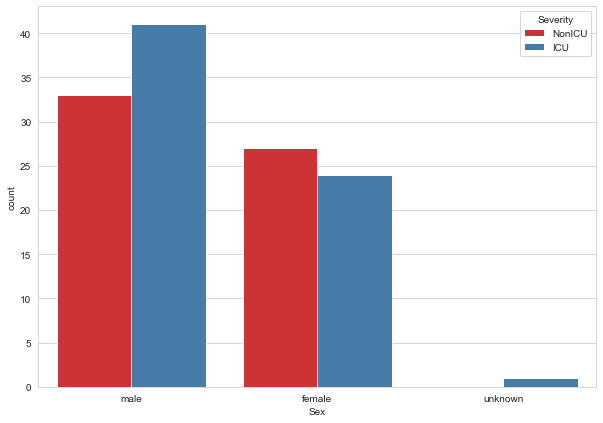

In [5]:
plt.figure(figsize=(10,7))
sns.countplot(x='Sex',hue='Severity',data=df,palette='Set1')

We can see that in males, there are more ICU patients than NonICU and in females, there are more NonICU patients than ICU patients.


<b>Countplot for Age column</b>

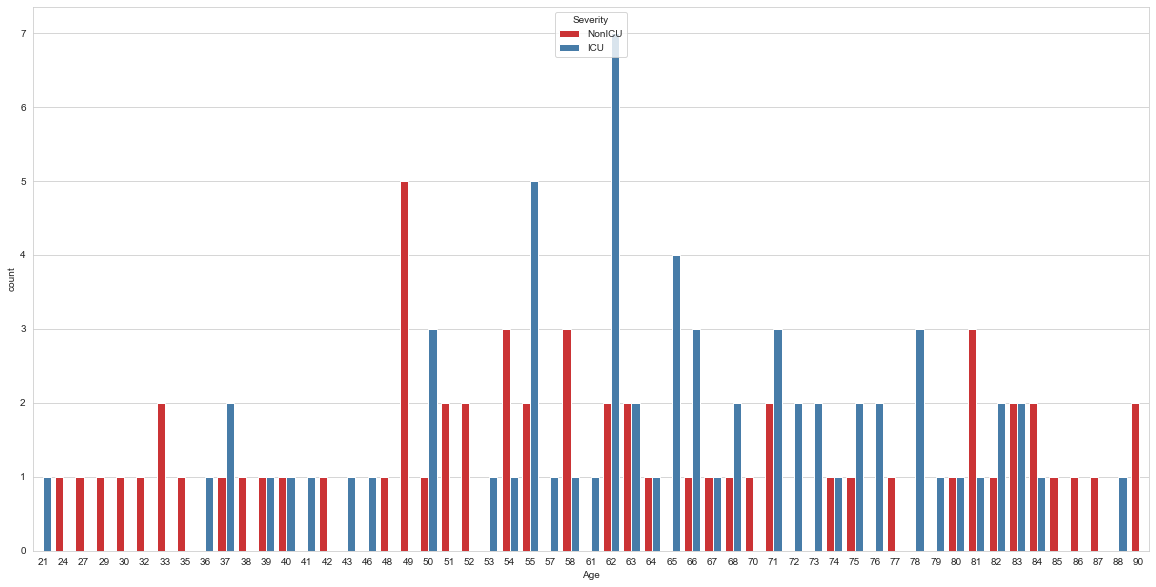

In [6]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Severity',data=df,palette='Set1')

From the above graph, patients admitted in ICU is more for the age group 62.

In [7]:
#Checking for missing alues and datatypes of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Columns: 19476 entries, Sample to ZZZ3
dtypes: float64(19472), int64(1), object(3)
memory usage: 18.7+ MB


In [8]:
df=pd.get_dummies(df, columns=['Sex'])

<b>Feature Variable X</b>

In [9]:
#selecting only the numerical features
X= df.drop(columns=['Sample','Severity','Age'])
X

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,Sex_female,Sex_male,Sex_unknown
0,0.49,0.00,0.21,0.04,0.07,0.0,0.03,18.92,4.07,0.0,...,1.63,15.51,0.06,8.17,363.01,19.17,6.05,0,1,0
1,0.29,0.00,0.14,0.00,0.00,0.0,0.05,18.68,3.00,0.0,...,1.15,15.62,0.14,8.20,399.80,15.72,4.12,0,1,0
2,0.26,0.00,0.03,0.02,0.00,0.0,0.07,13.85,1.83,0.0,...,0.32,17.67,0.28,3.62,430.35,13.95,1.81,0,1,0
3,0.45,0.01,0.09,0.07,0.00,0.0,0.00,22.11,4.22,0.0,...,2.21,15.61,0.27,7.88,209.25,14.78,7.15,0,1,0
4,0.17,0.00,0.00,0.05,0.07,0.0,0.00,8.45,1.17,0.0,...,0.55,9.34,0.07,5.96,272.91,8.69,2.70,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.30,0.00,0.02,0.02,0.00,0.0,0.00,17.06,1.96,0.0,...,0.46,5.93,0.24,1.58,447.14,3.04,1.00,0,1,0
122,0.70,0.00,0.02,0.01,0.00,0.0,0.00,20.31,1.54,0.0,...,0.73,8.75,0.12,1.57,748.55,4.55,1.56,1,0,0
123,0.75,0.00,0.27,0.00,0.06,0.0,0.00,27.25,3.42,0.0,...,1.29,14.93,0.14,5.05,437.62,10.34,3.99,1,0,0
124,2.80,0.00,0.04,0.00,0.00,0.0,0.00,21.64,1.43,0.0,...,0.45,4.77,0.33,1.07,369.66,1.83,0.96,0,1,0


<b>Tareget Variable y</b>

In [10]:
#Defining the target
y=df['Severity']
y

0      NonICU
1      NonICU
2      NonICU
3      NonICU
4      NonICU
        ...  
121    NonICU
122    NonICU
123    NonICU
124    NonICU
125       ICU
Name: Severity, Length: 126, dtype: object

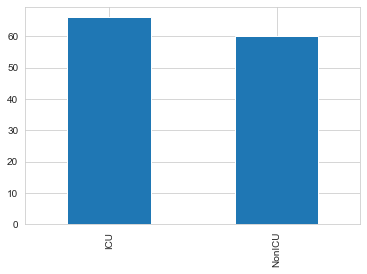

In [11]:
#Displaying the Value counts of the Target classes
y.value_counts().plot(kind='bar')


Both the classes are almost balanced with ICU class slighly greater than NonICU.

<b>Standardize the Variables</b><br>

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**


In [12]:
#Stadardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

Standardization needs to be performed before PCA as PCA is very sensitive to variance. Standard Scalar is used here for standardization.

In [13]:
scaled_data = scaler.transform(X)
scaled_data

array([[ 0.42542898, -0.47328638,  0.63694296, ..., -0.82462113,
         0.83827364, -0.08944272],
       [-0.24128808, -0.47328638,  0.12059766, ..., -0.82462113,
         0.83827364, -0.08944272],
       [-0.34129564, -0.47328638, -0.6908021 , ..., -0.82462113,
         0.83827364, -0.08944272],
       ...,
       [ 1.29216116, -0.47328638,  1.07952464, ...,  1.21267813,
        -1.19292788, -0.08944272],
       [ 8.12601106, -0.47328638, -0.61703849, ..., -0.82462113,
         0.83827364, -0.08944272],
       [-0.47463905, -0.47328638,  1.15328826, ..., -0.82462113,
         0.83827364, -0.08944272]])

Now mean and standard deviations of variables are approximately, 0 an 1 respectively.


<b> PCA transformation</b>

In [14]:
#performing PCA over the scaled data
from sklearn.decomposition import PCA
pca = PCA(n_components=10
         )
pca.fit(scaled_data)


PCA(n_components=10)

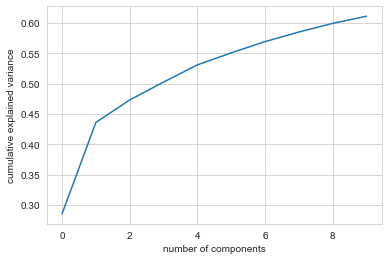

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

By selecting n_components=10, we can see that more than 60 percentage of the data is considered.

The number of columns changed from 19472 to 10 after doing PCA and selecting no. of components=10.


In [16]:
x_pca=pca.transform(scaled_data)
scaled_data.shape

(126, 19475)

In [17]:
x_pca.shape

(126, 10)

The following line import the principal components into a Pandas data frame and merge them with
the target.


In [18]:
df_pca = pd.concat([pd.DataFrame(data = x_pca),
df[['Severity']]],axis = 1)
df_pca.columns = ["c0","c1","c2","c3","c4","c5","c6","c7","c8","c9","Severity"]

In [19]:
#We are coverting the target into binary values.
df_pca['Severity'].replace(to_replace=['NonICU', 'ICU'], value=[0, 1], inplace=True)
df_pca

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,Severity
0,98.976419,3.170290,-50.475737,-68.015584,41.962137,-29.447963,45.382818,22.026441,3.582543,-14.098597,0
1,60.460121,8.911312,-12.494851,18.013165,14.398645,-30.688045,21.645297,-3.602070,-4.720479,15.608196,0
2,-29.816775,-29.983836,-49.326735,-34.827108,10.993873,28.425559,-4.763794,33.338003,-2.033980,25.241119,0
3,139.499747,23.511303,2.655565,0.304646,-30.983050,-19.269299,18.765458,-19.413724,-5.742300,1.651617,0
4,-16.780319,-68.062698,13.767829,-36.180258,3.523237,25.710117,-14.606502,7.297713,-6.120628,-15.231082,0
...,...,...,...,...,...,...,...,...,...,...,...
121,-92.801086,78.736526,14.012305,-1.781297,-13.748193,4.692353,1.179850,1.343702,-10.929491,-15.313856,0
122,-60.278942,92.222263,-51.629907,-11.280393,-6.864331,-2.047322,2.761585,10.518627,12.595395,-14.713658,0
123,42.224984,63.439931,-23.404617,5.038192,-48.322881,-3.205198,0.834812,0.088957,4.713089,3.430108,0
124,-75.950314,136.461880,-16.988605,4.214414,-22.386672,19.975894,-13.774357,-13.594924,-9.429747,-29.434229,0


The following line shows the singular values corresponding to each of the selected components.
Remember what the singular values are related to the eigenvalues of covariance matrix.

In [20]:
pca.singular_values_


array([811.10864578, 590.34818154, 292.60960051, 261.04089491,
       255.88195662, 214.03378665, 207.24706863, 190.87785294,
       181.49869091, 165.26379823])

The following line shows the percentage of variance explained by each of the selected components.
Remember how these values are computed, the variance ratio is equal to the squared values of each
singular value over the sum of squared values of all singular values.


In [21]:
pca.explained_variance_ratio_


array([0.28499572, 0.15097212, 0.03709005, 0.02951871, 0.02836349,
       0.01984472, 0.01860617, 0.01578307, 0.01427011, 0.01183139])

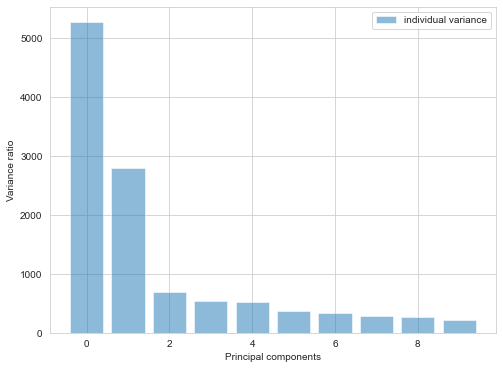

In [22]:
plt.figure(figsize=(8, 6))
plt.bar(range(10), pca.explained_variance_, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

The above plot shows the variance ratio for each principal components.

In [23]:
pca.components_


array([[ 0.00039984,  0.00535234,  0.00530106, ...,  0.00090122,
        -0.00101739,  0.00065951],
       [ 0.01146478, -0.00317495, -0.00050144, ...,  0.00332363,
        -0.00382677,  0.00284677],
       [-0.00976732, -0.00092564,  0.00436111, ...,  0.0035907 ,
        -0.0032062 , -0.00207369],
       ...,
       [-0.00435856, -0.00337173,  0.00344851, ...,  0.0074884 ,
        -0.00751616,  0.00027837],
       [-0.00471085, -0.00625295, -0.00325119, ...,  0.00219969,
        -0.00359706,  0.00778958],
       [-0.0157508 , -0.00511721, -0.01308561, ..., -0.00051938,
        -0.00065724,  0.00651967]])

The first PCA component is made by 0.00039984 of column ‘A1BG’, 0.00535234 of ‘A1CF’and so on.


In [24]:
X_df_pca=df_pca.drop(columns=['Severity'])
y_df_pca=df_pca['Severity']

<b>Train Test Split</b><br>
Now it's time to do a train test split, and train our model!<br>
** Split your data into a training set and a testing set.**


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_df_pca, y_df_pca, test_size=0.33, random_state=42)

For training we take 67% of data and for testing we take 33 percentage of data.

<b>Logistic Regression</b>

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

<b>Predictions on test data</b>

In [29]:
predictions = logmodel.predict(X_test)


<b>Evaluation</b>

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.84      0.76      0.80        21

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.81      0.81      0.81        42



<b>Confusion matrix</b>

The block below shows the accuracy matrix on test data.<br>
The module doing so is confusion_matrix from sklearn.metrics

In [32]:
#Making the confusion MAtrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,predictions)
ac = accuracy_score(y_test,predictions)
print("The Confusion Matrix :")
print(cm)
print("Accuracy Percentage : ",ac*100,"%")


The Confusion Matrix :
[[18  3]
 [ 5 16]]
Accuracy Percentage :  80.95238095238095 %


The obtained matrix shows the following:

    18 true negative predictions
    5 false negative predictions
    3 false positive prediction
    16 true positive predictions

Most of elements lie in the diagonal, which means that most of predictions are correct.



<b>Accuracy<b>

Let us now see how our model peform in train and test data.<br>

In [33]:
#Evaluation of test and training accuracy
print('Test Accuracy:', logmodel.score(X_test, y_test))
print('Training Accuracy:', logmodel.score(X_train, y_train))

Test Accuracy: 0.8095238095238095
Training Accuracy: 0.8214285714285714


The accuracy of our model is good; furthermore accuracy on train and test data are almost close.<br>

This means that our model does not underfit and does not overfit either, it simply fits very well unseen data.<br>
For this reason it does not need any tuning phase.

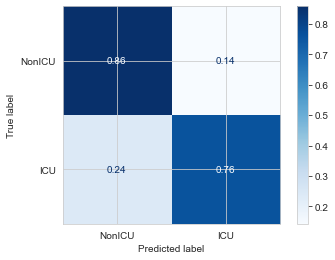

In [34]:
plot_confusion_matrix(logmodel,X_test,y_test,display_labels=['NonICU','ICU'],normalize='true',cmap='Blues');

<b>Feature Importance</b>

Feature: 0, Score: -0.02353
Feature: 1, Score: -0.01860
Feature: 2, Score: 0.00585
Feature: 3, Score: 0.05163
Feature: 4, Score: 0.00572
Feature: 5, Score: -0.02193
Feature: 6, Score: -0.00298
Feature: 7, Score: -0.02687
Feature: 8, Score: 0.02917
Feature: 9, Score: 0.00353


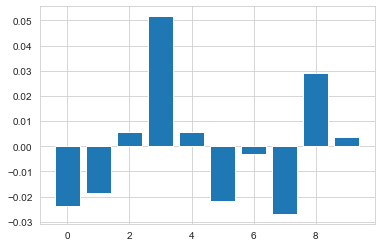

In [35]:
# get importance
from sklearn.datasets import make_classification
from matplotlib import pyplot
# get importance
importance = logmodel.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1(ICU), whereas the negative scores indicate a feature that predicts class 0(NonICU). A bar chart is then created for the feature importance scores.

<b>Interpretability</b><br>
Logistic regression is a very interpretable model.<br>
In fact,  β  coefficients allow us to understand the role of each feature in determine the predicted outcome.<br>

The line below inspects the  β  coefficients of our Logistic Regression model.


In [36]:
#Matrix of β  coefficients 
logmodel.coef_

array([[-0.02352744, -0.0185974 ,  0.00584829,  0.05162788,  0.00571682,
        -0.02192912, -0.00297533, -0.02686947,  0.02916542,  0.00353099]])

<b>Multicollinearity<b>

From theory we know that the  β  coefficients are stable only if our train data does not have multicollinearity.

In [37]:
X_train.corr()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
c0,1.000000,0.024597,-0.104268,0.014929,-0.025407,0.051703,0.006202,0.042273,-0.068140,0.074225
c1,0.024597,1.000000,-0.084821,-0.022815,-0.002386,0.037619,0.072076,-0.072222,-0.013194,0.053219
c2,-0.104268,-0.084821,1.000000,-0.041091,-0.052686,-0.122936,0.089486,0.063776,0.011117,-0.012690
c3,0.014929,-0.022815,-0.041091,1.000000,0.151296,-0.218898,-0.383816,-0.060085,-0.101046,-0.050600
c4,-0.025407,-0.002386,-0.052686,0.151296,1.000000,-0.013483,-0.131878,-0.106036,0.056426,-0.006370
c5,0.051703,0.037619,-0.122936,-0.218898,-0.013483,1.000000,-0.400105,0.104141,-0.058420,0.089964
c6,0.006202,0.072076,0.089486,-0.383816,-0.131878,-0.400105,1.000000,0.149453,-0.137064,0.130250
c7,0.042273,-0.072222,0.063776,-0.060085,-0.106036,0.104141,0.149453,1.000000,0.022989,-0.074147
c8,-0.068140,-0.013194,0.011117,-0.101046,0.056426,-0.058420,-0.137064,0.022989,1.000000,-0.080347
c9,0.074225,0.053219,-0.012690,-0.050600,-0.006370,0.089964,0.130250,-0.074147,-0.080347,1.000000


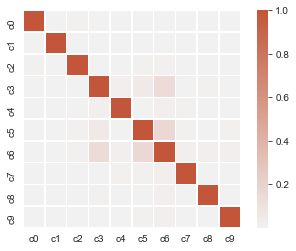

In [38]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(X_train.corr()**2, cmap=cmap, center=0, square=True, linewidths=.5)

Our data contains very low multicollinearity.<br>
This means that the above  β  coefficients are stable and can be used for interpretations.<br>
Our model can be used for hypothesis testing.

<b>ROC Curve</b>

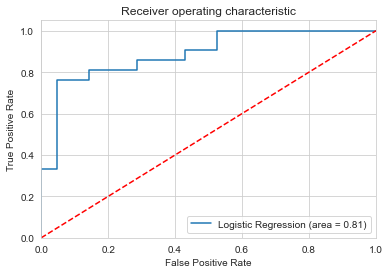

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
So it is clear that ours is a good model.
    
